In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from helpers import plot_tangent
import notebook_style
sns.set_palette("viridis", 6)

plt.rcParams.update({"legend.fontsize": 10, "legend.handlelength": 1.5, "legend.handletextpad": 0.5})

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numerical-Integration-of-Ordinary-Differential-Equations" data-toc-modified-id="Numerical-Integration-of-Ordinary-Differential-Equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical Integration of Ordinary Differential Equations</a></span><ul class="toc-item"><li><span><a href="#Example-problem" data-toc-modified-id="Example-problem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example problem</a></span></li><li><span><a href="#Euler's-method" data-toc-modified-id="Euler's-method-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Euler's method</a></span></li><li><span><a href="#Heun's-method" data-toc-modified-id="Heun's-method-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Heun's method</a></span></li><li><span><a href="#Midpoint-method" data-toc-modified-id="Midpoint-method-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Midpoint method</a></span></li><li><span><a href="#Runge-Kutta-4-method" data-toc-modified-id="Runge-Kutta-4-method-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Runge-Kutta-4 method</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li></ul></div>

# Numerical Integration of Ordinary Differential Equations

_notebook by Nico Liebers (nico.liebers@dlr.de), Deutsches Zentrum für Luft- und Raumfahrt (DLR), 2020_

    Code under MIT license, all other material under CC-BY-3.0 license


This notebook demonstrates the numerical solution of a ODE with different methods. 


## Example problem


Example ordinary differential equation (ODE): 

$y' = \frac{dy}{dx} = -x \cdot y$

Using the initial condition:

$y (x=0) = 2$

We can derive the analytical solution:

$y = 2 e^{\frac{x^2}{2}}$

<IPython.core.display.Javascript object>


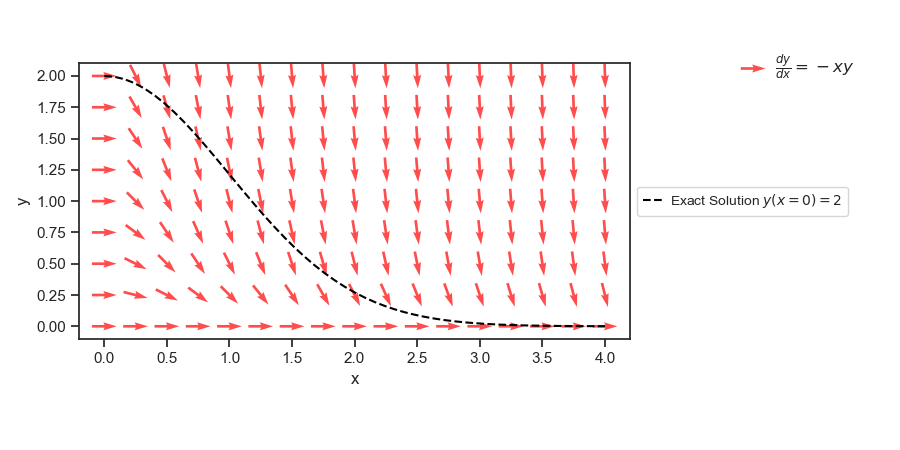

In [2]:
def dydx(x0, y0):
    """Return dy/dx at point (x0, y0)"""
    return -x0 * y0

def analytical_solution(x):
    """Exact solution to example ODE"""
    return 2 * np.exp(- x**2 / 2)

def plot_solution(x0, x_max):
    """Plot analytical solution with small step size"""
    x_exact = np.linspace(0, x_max, 51)
    y_exact = analytical_solution(x_exact)
    plt.plot(x_exact, y_exact, 
             color="black", ls="--", 
             label="Exact Solution $y (x=0) = 2$")

def postprocess_figure():
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.subplots_adjust(right=.7)
    plt.legend(loc="center left", bbox_to_anchor=[1, .5]);
    
x_max = 4 
dx = .25

x = np.arange(0, x_max+dx, dx)
y = np.arange(0, 2+dx, dx)

xx, yy = np.meshgrid(x, y)

plt.figure()
ax = plt.gca()
grad = dydx(xx, yy)
# 
N = np.sqrt(grad**2 + dx**2)
Q = plt.quiver(xx, yy, dx/N, grad/N, color="red", pivot="mid", alpha=.7)
qk = ax.quiverkey(Q, 0.85, 0.85, 1, r"$\frac{dy}{dx} = -xy$", labelpos='E',
                   coordinates='figure')
ax.set_aspect("equal")
plot_solution(0, x_max)
postprocess_figure()

## Euler's method

$k_1 = y'(x_0, y_0)$

$y_{i+1} \approx y_i + k_1 \Delta x$

<IPython.core.display.Javascript object>


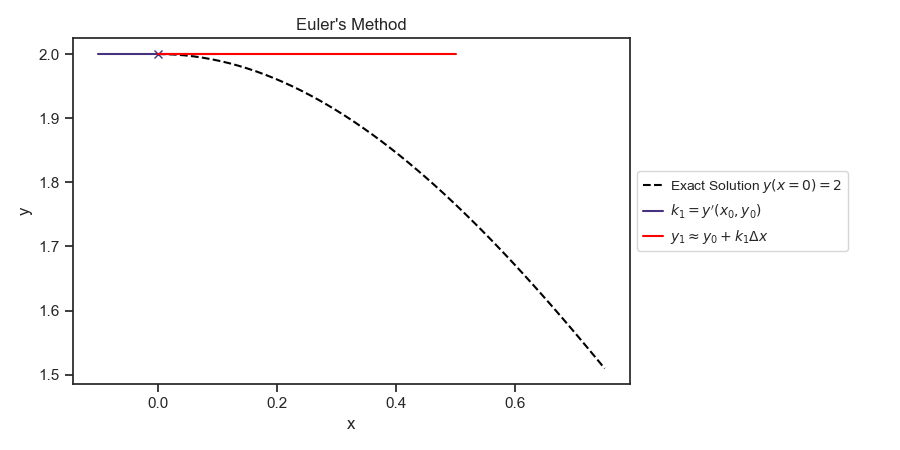

In [3]:
dx = .5
y0 = 2
x0 = 0

plt.figure()
plt.title("Euler's Method")
plot_solution(x0, x0 + dx*1.5)

x1 = x0 + dx
k1 = dydx(x0, y0)
y1 = y0 + k1*dx

plot_tangent(x0, y0, k1, dx, r"$k_1 = y'(x_0, y_0)$")
plt.plot([x0, x1], [y0, y1], color="red", 
         label=r"$y_1 \approx y_0 + k_1 \Delta x$")
postprocess_figure()

<IPython.core.display.Javascript object>


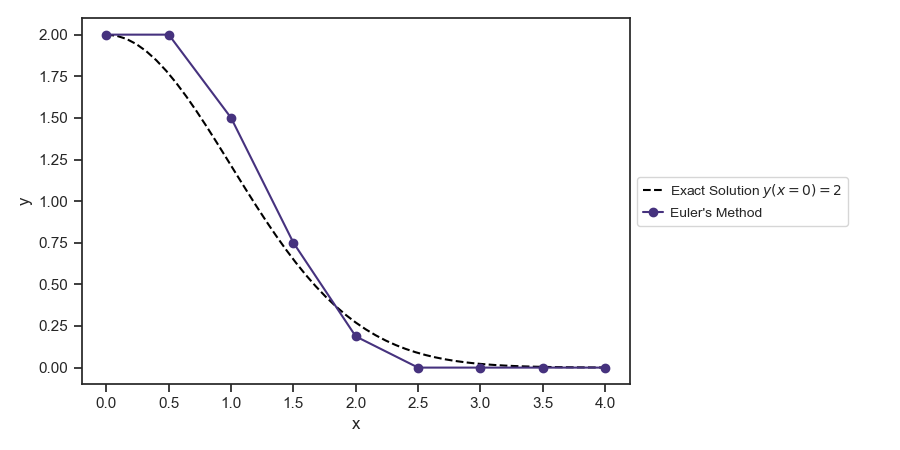

In [4]:
def eulers_method(x0, y0, dx):
    """Euler's Method"""
    k1 = dydx(x0, y0)
    return y0 + k1 * dx

def iterate(x0, y0, dx, x_max, method):
    """Numerical Integration Wrapper"""
    Nx = int((x_max - x0) / dx) + 1 
    x = np.arange(Nx) * dx + x0
    y = np.zeros(Nx)
    y[0] = y0
    for n in range(1, Nx):
        y[n] = method(x[n-1], y[n-1], dx)
    return x, y
        
dx = .5
y0 = 2
x0 = 0

plt.figure()
plot_solution(x0, x_max)

x, euler = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=eulers_method)

plt.plot(x, euler, "o-", label = "Euler's Method")
postprocess_figure()

<IPython.core.display.Javascript object>


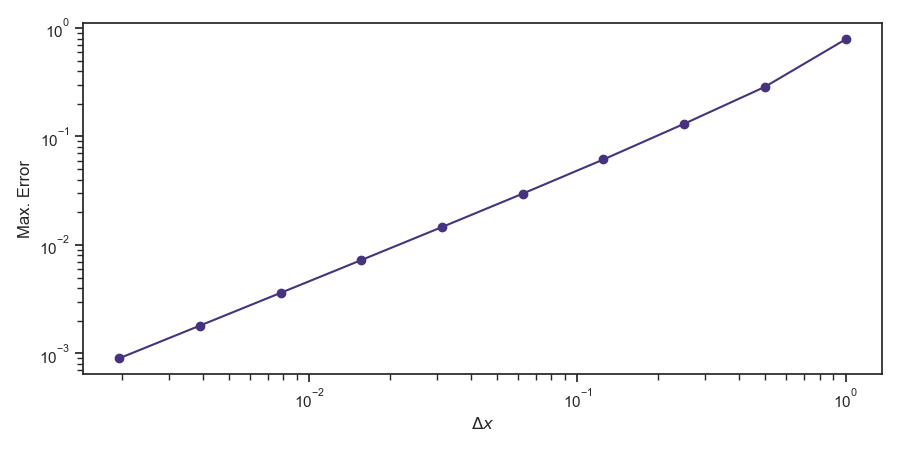

In [5]:
def calc_max_error(x0, y0, x_max, dx, method):
    """
    Calculate maximum absolute error for all dx between exact solution and 
    numerical method
    """
    max_error = np.zeros(np.size(dx))
    for i, _dx in enumerate(dx):
        x, y = iterate(x0=x0, y0=y0, dx=_dx, x_max=x_max, method=method)
        y_exact = analytical_solution(x)
        max_error[i] = np.max(np.abs(y - y_exact))
    return max_error
    
y0 = 2
x0 = 0

dx = 2.**-np.arange(10)
max_error = calc_max_error(x0, y0, x_max, dx, eulers_method)
    
plt.figure()
plt.plot(dx, max_error, "o-")
plt.xlabel(r"$\Delta x$")
plt.ylabel(r"Max. Error")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout();

## Heun's method

$k_1 = y'(x_0, y_0)$

$k_2 = y'(x_0 + \Delta x, y_0 + k_1 \Delta x)$

$y_1 \approx y_0 + \frac{k_1 + k_2}{2} \Delta x$

<IPython.core.display.Javascript object>


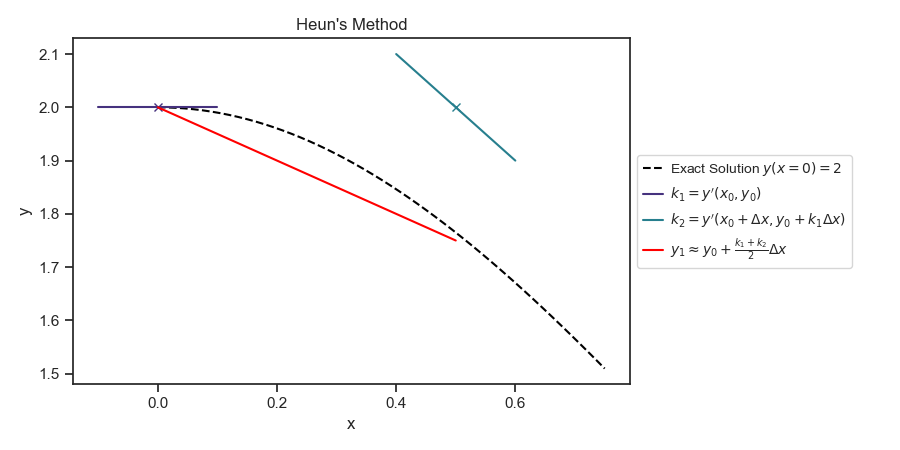

In [6]:
dx = .5
y0 = 2
x0 = 0

plt.figure()
plt.title("Heun's Method")
plot_solution(x0, x0 + dx*1.5)

x1 = x0 + dx
k1 = dydx(x0, y0)
y_ = y0 + k1 * dx
k2 = dydx(x1, y_)
y1 = y0 + (k1 + k2) / 2 * dx

plot_tangent(x0, y0, k1, dx, r"$k_1 = y'(x_0, y_0)$")
plot_tangent(x1, y_, k2, dx, r"$k_2 = y'(x_0 + \Delta x, y_0 + k_1 \Delta x)$")
plt.plot([x0, x0+dx], [y0, y1], color="red", 
         label=r"$y_1 \approx y_0 + \frac{k_1 + k_2}{2} \Delta x$")

postprocess_figure()

<IPython.core.display.Javascript object>


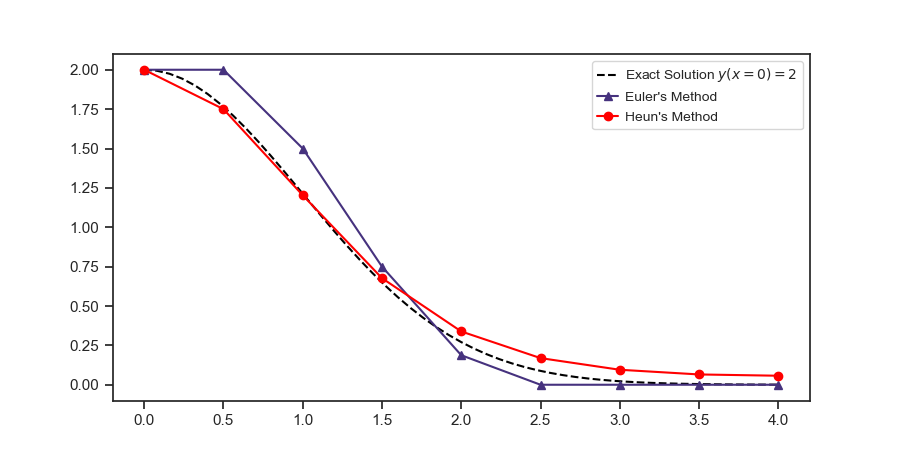

In [7]:
def heuns_method(x0, y0, dx):
    """Heun's Method"""
    x1 = x0 + dx
    k1 = dydx(x0, y0)
    y_ = y0 + k1 * dx
    k2 = dydx(x1, y_)
    y1 = y0 + (k1 + k2) / 2 * dx
    return y1
        
dx = .5
y0 = 2
x0 = 0

plt.figure()
plot_solution(x0, x_max)

x, euler = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=eulers_method)
plt.plot(x, euler, "^-", 
         label="Euler's Method")

x, heun = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=heuns_method)
plt.plot(x, heun, "o-", color="red",
         label="Heun's Method")

plt.legend();

## Midpoint method

$k_1 = y'(x_0, y_0)$

$k_2 = y'(x_0 + \frac{1}{2}, y_0 + k_1 \frac{\Delta x}{2})$

$y_1 \approx y_0 + k_2 \Delta x$

<IPython.core.display.Javascript object>


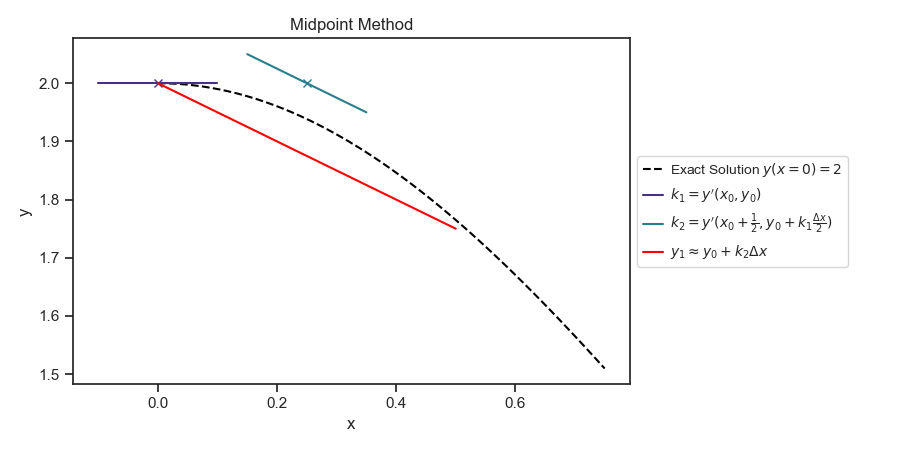

In [8]:
dx = .5
y0 = 2
x0 = 0

plt.figure()
plt.title("Midpoint Method")
plot_solution(x0, x0 + dx*1.5)

k1 = dydx(x0, y0)
plot_tangent(x0, y0, k1, dx, 
             r"$k_1 = y'(x_0, y_0)$")

x_ = x0 + dx/2
y_ = y0 + k1 * dx/2
k2 = dydx(x_, y_)
plot_tangent(x_, y_, k2, dx, 
             r"$k_2 = y'(x_0 + \frac{1}{2}, y_0 + k_1 \frac{\Delta x}{2})$")

y1 = y0 + k2 * dx
plt.plot([x0, x0+dx], [y0, y1], color="red", 
         label=r"$y_1 \approx y_0 + k_2 \Delta x$")

postprocess_figure()

<IPython.core.display.Javascript object>


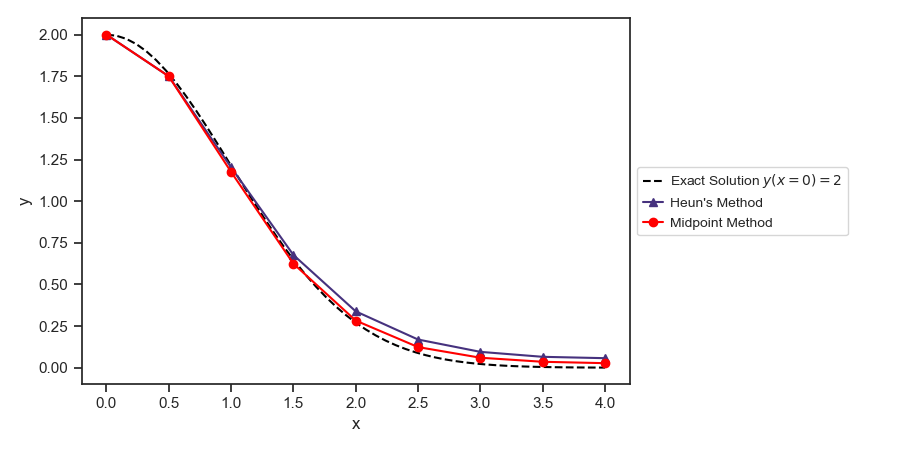

In [9]:
def midpoint_method(x0, y0, dx):
    """Midpoint Method"""
    k1 = dydx(x0, y0)
    k2 = dydx(x0 + dx/2, y0 + k1 * dx/2)
    y1 = y0 + k2 * dx
    return y1
        
dx = .5
y0 = 2
x0 = 0

plt.figure()
plot_solution(x0, x_max)

x, heun = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=heuns_method)
plt.plot(x, heun, "^-", 
         label="Heun's Method")

x, midpoint = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=midpoint_method)
plt.plot(x, midpoint, "o-",  color="red",
         label="Midpoint Method")

postprocess_figure()

## Runge-Kutta-4 method

$k_1 = y'(x_0, y_0)$


$k_2 = y' \left( x_0 + \frac{\Delta x}{2}, y_0 + k_1 \frac{\Delta x}{2} \right)$

$k_3 = y' \left( x_0 + \frac{\Delta x}{2}, y_0 + k_2 \frac{\Delta x}{2} \right)$

$k_4 = y' \left( x_0 + \Delta x, y_0 + k_3 \Delta x \right)$

$y_1 \approx y_0 + \left( k_1 + 2 k_2 + 2 k_3 + k4 \right) \frac{\Delta x}{6}$

<IPython.core.display.Javascript object>


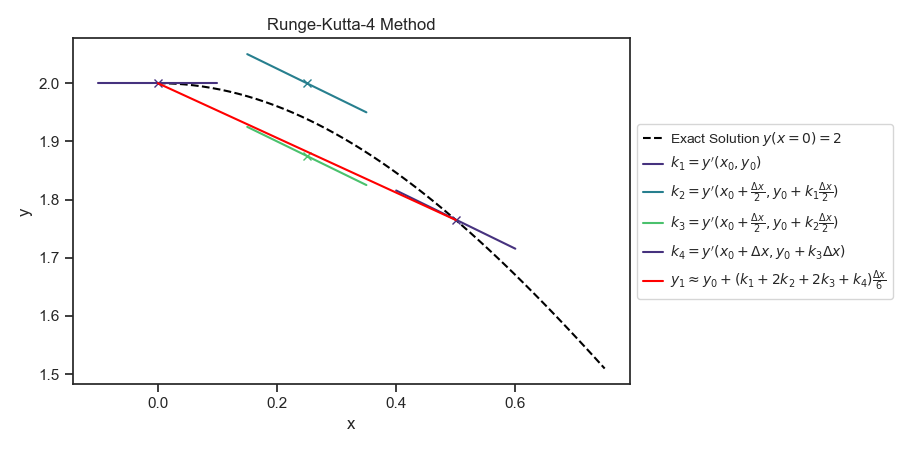

In [10]:
dx = .5
y0 = 2
x0 = 0

plt.figure()
plt.title("Runge-Kutta-4 Method")
plot_solution(x0, x0 + dx*1.5)

k1 = dydx(x0, y0)
plot_tangent(x0, y0, k1, dx, 
             r"$k_1 = y'(x_0, y_0)$")
x_ = x0 + dx/2
y_ = y0 + k1 * dx/2
k2 = dydx(x_, y_)
plot_tangent(x_, y_, k2, dx, 
             r"$k_2 = y'( x_0 + \frac{\Delta x}{2}, y_0 + k_1 \frac{\Delta x}{2})$")
y_ = y0 + k2 * dx/2
k3 = dydx(x_, y_)
plot_tangent(x_, y_, k2, dx, 
             r"$k_3 = y'( x_0 + \frac{\Delta x}{2}, y_0 + k_2 \frac{\Delta x}{2})$")
x_ = x0 + dx
y_ = y0 + k3 * dx
k4 = dydx(x_, y_)
plot_tangent(x_, y_, k2, dx, 
             r"$k_4 = y'( x_0 + \Delta x, y_0 + k_3 \Delta x)$")


y1 = y0 + (k1 + 2*k2 + 2*k3 + k4) * dx / 6

plt.plot([x0, x0+dx], [y0, y1], color="red", 
         label=r"$y_1 \approx y_0 + \left( k_1 + 2 k_2 + 2 k_3 + k_4 \right) \frac{\Delta x}{6}$")

postprocess_figure()

<IPython.core.display.Javascript object>


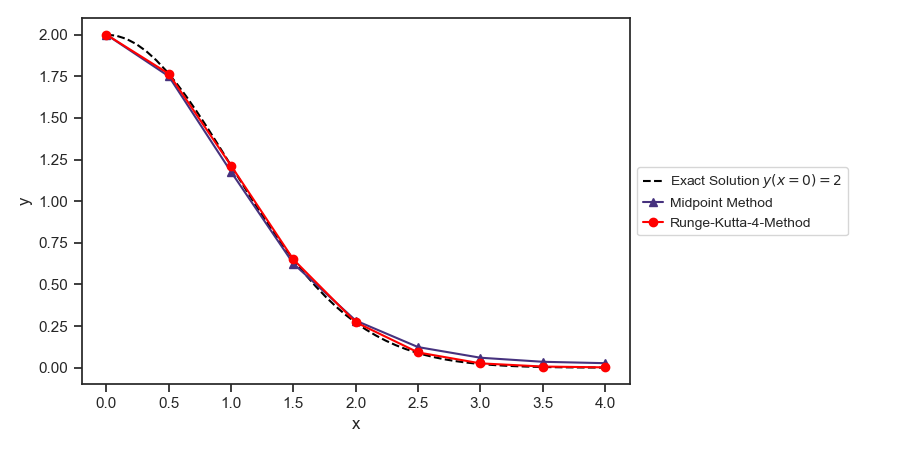

In [11]:
def RK4_method(x0, y0, dx):
    """Runge-Kutta-4-Method"""
    k1 = dydx(x0, y0)
    x_ = x0 + dx/2
    k2 = dydx(x_, y0 + k1 * dx/2)
    k3 = dydx(x_, y0 + k2 * dx/2)
    k4 = dydx(x0 + dx, y0 + k3 * dx)
    y1 = y0 + (k1 + 2*k2 + 2*k3 + k4) * dx / 6
    return y1
        
dx = .5
y0 = 2
x0 = 0

plt.figure()
plot_solution(x0, x_max)

x, midpoint = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=midpoint_method)
plt.plot(x, midpoint, "^-", 
         label="Midpoint Method")

x, rk4 = iterate(x0=x0, y0=y0, dx=dx, x_max=x_max, method=RK4_method)
plt.plot(x, rk4, "o-",  color="red",
         label="Runge-Kutta-4-Method")

postprocess_figure()

## Comparison

<IPython.core.display.Javascript object>


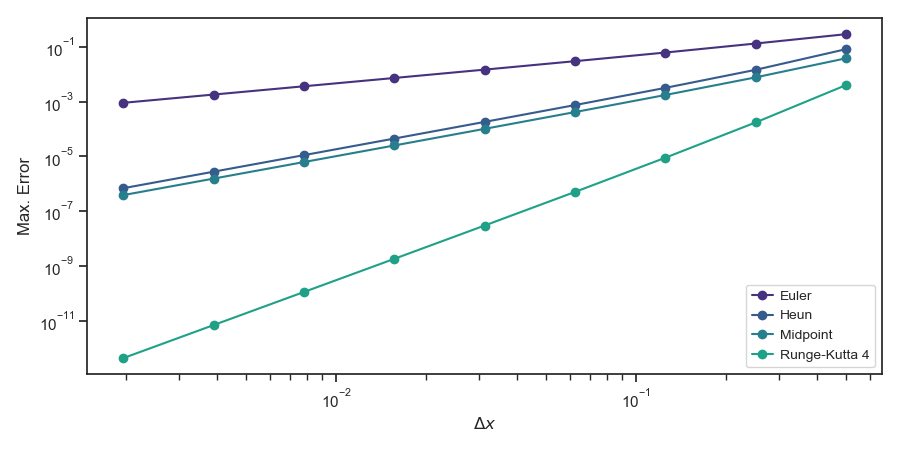

In [12]:
y0 = 2
x0 = 0

dx = 2.**-np.arange(1, 10)
plt.figure()
for method, label in zip([eulers_method, heuns_method, midpoint_method, RK4_method], 
                         ["Euler", "Heun", "Midpoint", "Runge-Kutta 4"]):
    max_error = calc_max_error(x0, y0, x_max, dx, method)
    plt.plot(dx, max_error, "o-", label=label)
plt.xlabel(r"$\Delta x$")
plt.ylabel(r"Max. Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.tight_layout();